In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [ ]:
checker = pd.read_sql("SELECT * FROM checker;", conn)
checker.head()

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
sql = """SELECT 
    DATE(timestamp) as date,
    CASE 
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 4 THEN 'night'
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 10 THEN 'morning'
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 17 THEN 'afternoon'
        ELSE 'evening'
    END as daytime,
    COUNT(*) as commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date, daytime;"""
pageviews = pd.read_sql(sql, conn)
pageviews

pivot = pageviews.pivot(
    index='date',
    columns='daytime',
    values='commits').fillna(0)
pivot = pivot[['night', 'morning', 'afternoon', 'evening']]
pivot.count()


daytime
night        35
morning      35
afternoon    35
evening      35
dtype: int64

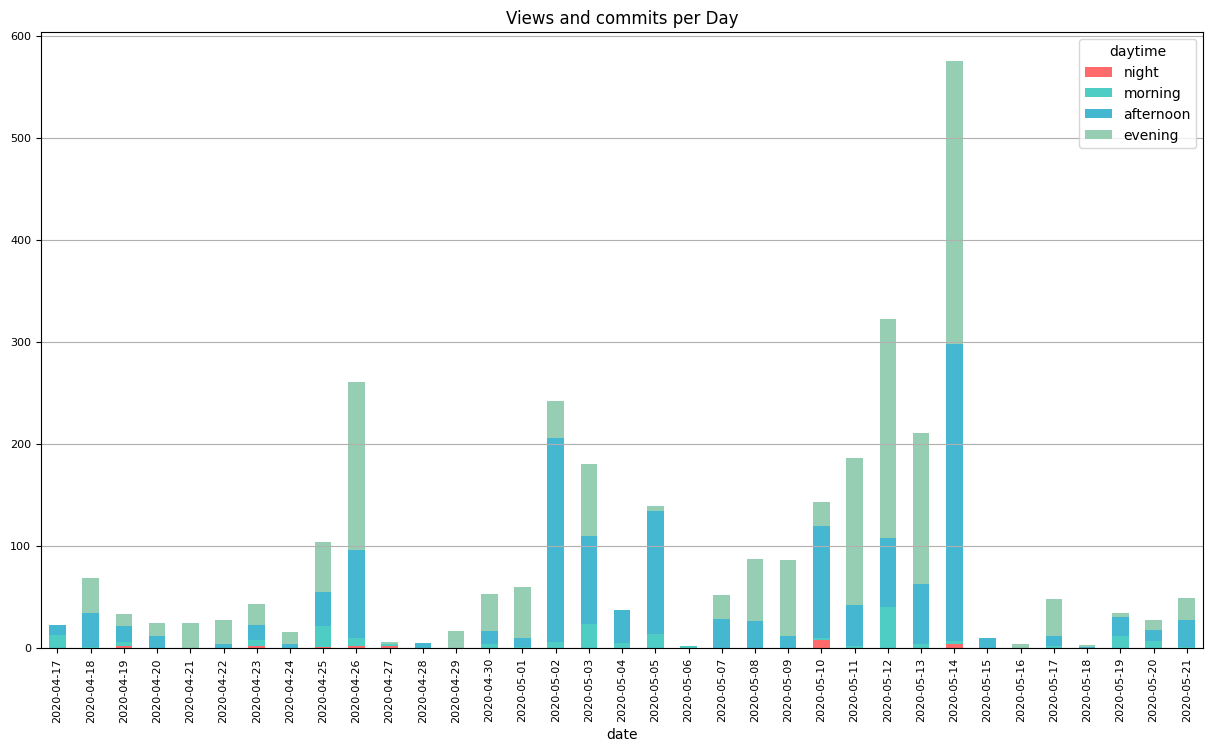

In [5]:
ax = pivot.plot(
    kind='bar',
    stacked=True,
    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
    figsize=(15, 8),
    fontsize = 8,
    title='Views and commits per Day',
    rot = 90,
    label='views'
)

ax.yaxis.grid(True)

In [6]:
conn.close()